### Notebook 2 - Deriving prior distributions from Schwanhäusser et al. "Global quantification of mammalian gene expression control" Nature 2011

In order to derive a meaningful prior distributions for $\beta$ and $\delta$ estimation based on our data, we inspect the distribution of these two quantitites in the Schwanhäusser data and fit $\Gamma$ distributions to their logs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.stats import spearmanr, gamma
from MCMC_pipe import import_data

In [2]:
sns.set_context('talk')
sns.set_style('white')

#### A) Data import and preparation

In [3]:
schwan_df = pd.read_excel('external_data/Schwanhaeusser_simple.xlsx', index_col=0, header=0)

In [4]:
schwan_df.columns

Index(['S Protein copy [molecules/cell]',
       'S mRNA copy number [molecules/cell]', 'S Protein half-life [h]',
       'S mRNA half-life [h]', 'S transcription rate [molecules/(cell*h)]',
       'S translation rate constant [molecules/(mRNA*h)]'],
      dtype='object')

In [5]:
# add log decay and translation
schwan_df['delta'] = np.log(2)/schwan_df['S Protein half-life [h]']
schwan_df['log_delta'] = np.log(schwan_df['delta'])
schwan_df['log_beta'] = np.log(schwan_df['S translation rate constant [molecules/(mRNA*h)]'])

(0.0, 0.2)

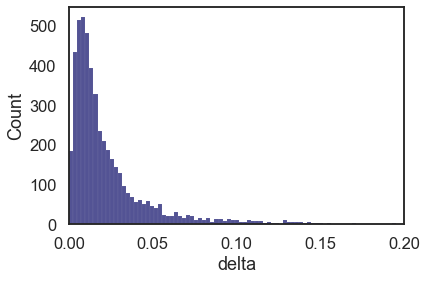

In [6]:
sns.histplot(data=schwan_df, x='delta', color='midnightblue')
plt.xlim((0, 0.2))

In [7]:
len(schwan_df['log_delta'].dropna())

5028

<AxesSubplot:xlabel='log_delta', ylabel='Count'>

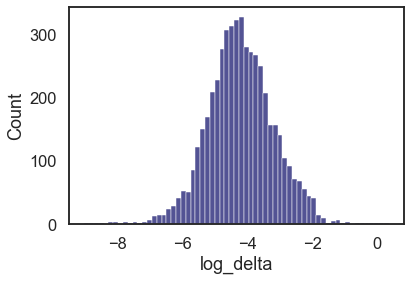

In [8]:
sns.histplot(data=schwan_df, x='log_delta', color='midnightblue')

(0.0, 2000.0)

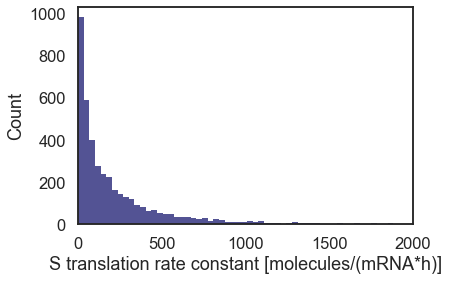

In [9]:
sns.histplot(data=schwan_df, x='S translation rate constant [molecules/(mRNA*h)]', color='midnightblue')
plt.xlim((0, 2000))

In [10]:
len(schwan_df['log_beta'].dropna())

4247

<AxesSubplot:xlabel='log_beta', ylabel='Count'>

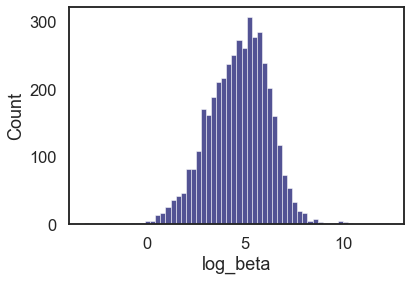

In [11]:
sns.histplot(data=schwan_df, x='log_beta', color='midnightblue')

#### B) Fitting $\Gamma$ distributions and export

9067.134261396382 -101.68409915306495 0.010751460033361165


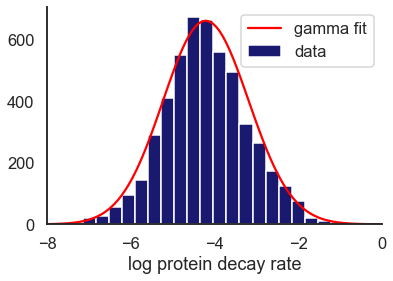

In [12]:
# for log delta
d_fit_a, d_fit_loc, d_fit_scale = gamma.fit(schwan_df['log_delta'].dropna())
print(d_fit_a, d_fit_loc, d_fit_scale)
plt.hist(schwan_df['log_delta'], bins=30, color='midnightblue', label='data')
plt.plot(np.linspace(-8, 0, 100), 1700*gamma.pdf(np.linspace(-8, 0, 100), d_fit_a, d_fit_loc, d_fit_scale), color='red', label='gamma fit')
plt.xlabel('log protein decay rate')
plt.xlim((-8, 0))
plt.legend()
sns.despine()

In [13]:
# write the gamma parameters into dictionary and export
delta_dict = {'a': d_fit_a, 'loc': d_fit_loc, 'scale': d_fit_scale}
delta_df = pd.DataFrame.from_dict(delta_dict, orient='index', columns=['value'])
delta_df.to_csv('processed_data/log_delta_gamma_fit.csv')

In [14]:
delta_df

,value
a,9067.134261
loc,-101.684099
scale,0.010751


419.1428812342312 -27.188132586492834 0.07596274900158642


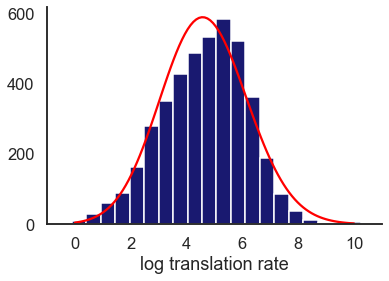

In [15]:
# for log beta
b_fit_a, b_fit_loc, b_fit_scale = gamma.fit(schwan_df['log_beta'].dropna())
print(b_fit_a, b_fit_loc, b_fit_scale)
plt.hist(schwan_df['log_beta'], bins=30, color='midnightblue', label='data')
plt.plot(np.linspace(0, 10, 100), 2300*gamma.pdf(np.linspace(0, 10, 100), b_fit_a, b_fit_loc, b_fit_scale), color='red', label='gamma fit')
plt.xlabel('log translation rate')
plt.xlim((-1, 11))
sns.despine()

In [16]:
# write the gamma parameters into dictionary and export
beta_dict = {'a': b_fit_a, 'loc': b_fit_loc, 'scale': b_fit_scale}
beta_df = pd.DataFrame.from_dict(beta_dict, orient='index', columns=['value'])
beta_df.to_csv('processed_data/log_beta_gamma_fit.csv')

In [17]:
beta_df

,value
a,419.142881
loc,-27.188133
scale,0.075963
